# Obstacles & Position

In [1]:
import numpy as np
import matplotlib.pylab as plt
import time 
%matplotlib inline
import pickle
from numpy import linalg as LA
from random import randint
from graphics import *

# Create Objects

Need to randomly select, size and position of objects.

To simplify the problem the following assumptions will be made:
<ol>
<li> horizontal flight, z = 0 </li>
<li> objects are spheres , symmetric about x, y, and z axis </li>
<li> There is a maximum range up to which object can be detected </li>
</ol>

# no overlap 

To ensure there is not overlap the distance between the center of two circles must fulfill the following requirement, R1 and R2 are the radiuses of the respective circles:
$$ D_{1,2}<(R_{1} + R_{2}) +SF1  $$

Equally to ensure that a position of the drone does not fall within the area of a certain obstacle: 
$$ D_{1,2}<R_{1} + SF2 $$
where R1 is the radius of the obstacle, and SF a safety factor, margin


In [2]:
# Initial restrictions on obstacles
area = 10
numObj = 10
minRadius = 2
maxRadius = 4
maxDis= 10
#Safety factor for intersection between obstalces
SF1 = 1.5



In [3]:
# Inititate random obstacle, keep adding and checking whether obstacles do not overlap, until max number 
# of obstacles is reached

s =[]
s.append(np.array([randint(-maxDis, maxDis), randint(-maxDis, maxDis),0, np.random.sample()*maxRadius]))

stopObj =False
i = 1
while stopObj == False: 
    intersect = False
    s_2 = np.array([randint(-maxDis, maxDis), randint(-maxDis, maxDis),0, np.random.sample()*maxRadius])
    for num in s:
        if LA.norm([num[0:2]-s_2[0:2]])< (num[3]+s_2[3])+SF1:
            intersect = True

    if intersect == False:
        s.append(s_2)
        i = i+1
        if i>numObj-1:
            stopObj = True
obstacle =s

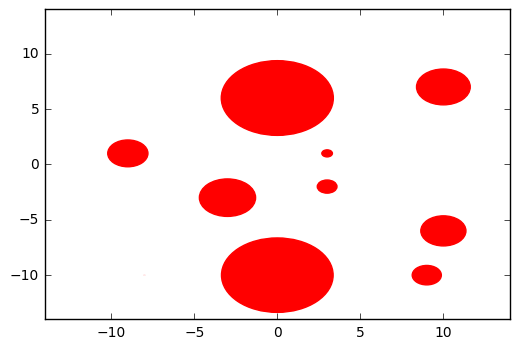

In [4]:
fig, ax = plt.subplots()
limits = maxRadius + maxDis
ax.set_xlim((-limits, limits))
ax.set_ylim((-limits, limits))
for c in s:
    point =(c[0],c[1])
    circle = plt.Circle(point, c[3], color='r')
    ax.add_artist(circle)
 
# circle = plt.Circle((position[0],position[1]), 0.2, color='b')
# ax.add_artist(circle)  


In [5]:
# Saving the objects:
with open('obstacles.pickle', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([obstacle, maxRadius, maxDis, area ], f)